In [ ]:
# Importing libraries 
import cv2
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import *

In [ ]:
# define function that build fully connected NN with encoder and decoder 
def build_autoencoder(input_shape=784, encoding_dim=128):
    input_layer = Input(shape=(input_shape,))
    encoded = Dense(units=512)(input_layer)
    encoded = ReLU()(encoded)
    encoded = Dense(units=256)(encoded)
    encoded = ReLU()(encoded)

    encoded = Dense(encoding_dim)(encoded)
    encoding = ReLU()(encoded)

    decoded = Dense(units=256)(encoding)
    decoded = ReLU()(decoded)
    decoded = Dense(units=512)(decoded)
    decoded = ReLU()(decoded)
    decoded = Dense(units=input_shape)(decoded)
    decoded = Activation('sigmoid')(decoded)

    return Model(input_layer, decoded)

In [ ]:
# Loading dataset 
(X_train, _), (X_test, _) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# Build , Compile and Fit model 
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

EPOCHS = 20
BATCH_SIZE = 1024
autoencoder.fit(X_train, X_train,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                shuffle=True,
                validation_data=(X_test, X_test))


Epoch 1/20
59/59 [==============================] - 7s 108ms/step - loss: 0.0684 - val_loss: 0.0379
Epoch 2/20
59/59 [==============================] - 6s 106ms/step - loss: 0.0315 - val_loss: 0.0275
Epoch 3/20
59/59 [==============================] - 6s 107ms/step - loss: 0.0242 - val_loss: 0.0221
Epoch 4/20
59/59 [==============================] - 6s 108ms/step - loss: 0.0214 - val_loss: 0.0200
Epoch 5/20
59/59 [==============================] - 6s 106ms/step - loss: 0.0187 - val_loss: 0.0181
Epoch 6/20
59/59 [==============================] - 6s 105ms/step - loss: 0.0174 - val_loss: 0.0173
Epoch 7/20
59/59 [==============================] - 6s 106ms/step - loss: 0.0181 - val_loss: 0.0171
Epoch 8/20
59/59 [==============================] - 6s 107ms/step - loss: 0.0156 - val_loss: 0.0152
Epoch 9/20
59/59 [==============================] - 6s 106ms/step - loss: 0.0148 - val_loss: 0.0144
Epoch 10/20
59/59 [==============================] - 6s 106ms/step - loss: 0.0141 - val_loss: 0.0138

In [ ]:
# making predictions
predictions = autoencoder.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
original_shape = (X_test.shape[0], 28, 28)
predictions = predictions.reshape(original_shape)
X_test = X_test.reshape(original_shape)



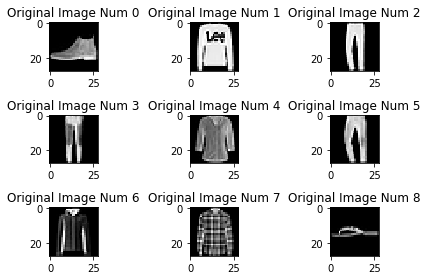

In [ ]:
from matplotlib import pyplot as plt
for i, img in enumerate(X_test[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(img.reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Original Image Num {}".format(i))
    plt.tight_layout()

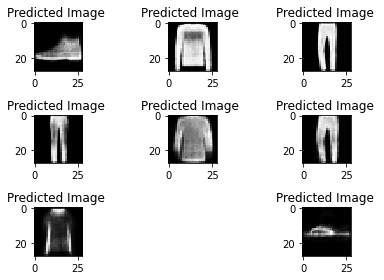

In [ ]:
for i, img in enumerate(predictions[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(img.reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted Image ")
    plt.tight_layout()